### 1. Exploratory Data Analysis(EDA)

In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png{
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [2]:
# we import usesful libraries
# remove warnings
import warnings
warnings.filterwarnings('ignore')

#-----
%matplotlib inline
import pandas as pd
pd.options.display.max_columns=100
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np
pd.options.display.max_rows=100

In [3]:
''' now we have two dataset -> Training and Test Set. We will be using taining set to build our predictive model and 
  test set to score it and generate output file to submit on kaggle evaluation system '''

# now we load the training set
data=pd.read_csv('train.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [5]:
''' here survived column is the targer variable . If survived=1 means passsanger survived otherwise he is dead '''

''' THe other variables that describe passanger are --
     
     passangerId- id given to each traveler on boat
     Pclass - passanger class. It has 3 values- 1,2,3
     Name     Sex        
     SibSp - number of siblings and spouses travelling with passanger
     Parch - number of parents travelling with passanger
     Ticket number
     Fare   number
     Cabin number
     Embarked - it has 3 values s, c,q '''

# describing numerical features with descibr method
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
''' The countvariable shows that 177 valus are missing in the age column. 
     one solution is to replace the null values with median age which is more robust to outliers than mean '''

data['Age'].fillna(data['Age'].median(),inplace=True)

In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


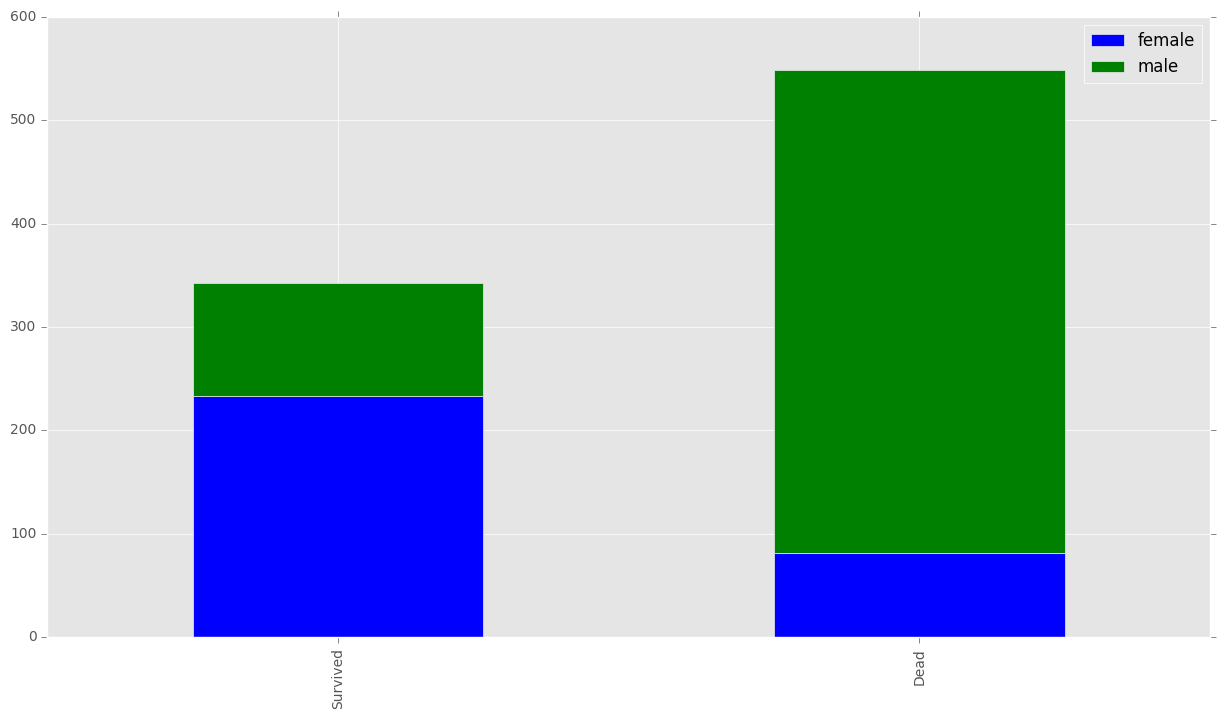

In [8]:
# now let make some chart
# Let's visualize survival based on Gender
survived_sex=data[data['Survived']==1]['Sex'].value_counts()
dead_sex=data[data['Survived']==0]['Sex'].value_counts()
df=pd.DataFrame([survived_sex,dead_sex])
df.index=['Survived', 'Dead']
df.plot(kind='bar', stacked=True, figsize=(15,8))

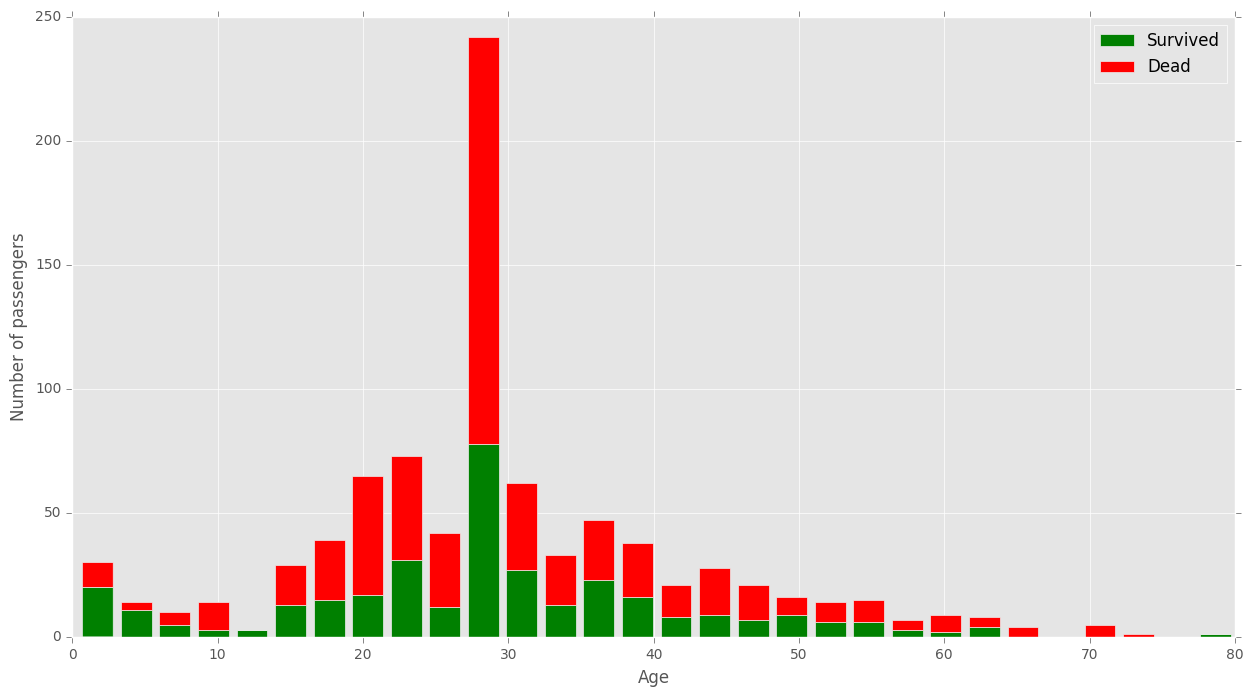

In [9]:
# here sex variable seems to be decisive feature. Women are more likely to survived_sex
# Let's now corrrelate survival with age variable

figure=plt.figure(figsize=(15,8))
plt.hist([data[data['Survived']==1]['Age'], data[data['Survived']==0]['Age']], stacked=True, color=['g','r'],
        bins=30, label=['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()

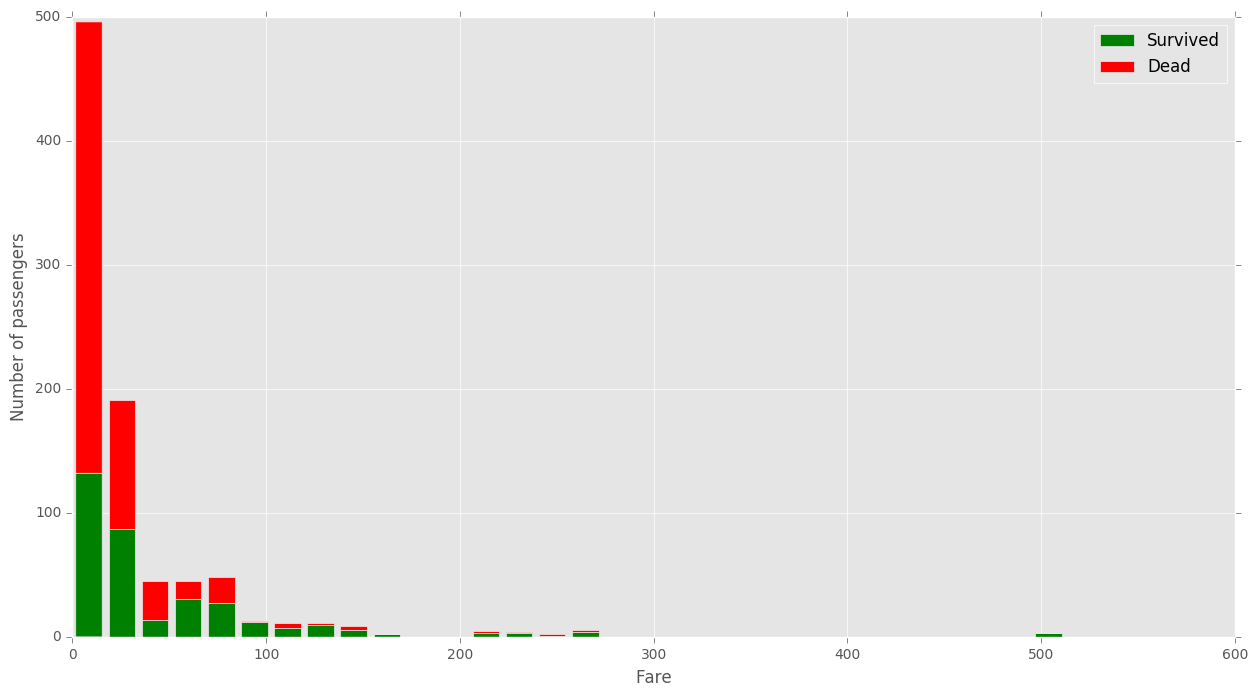

In [10]:
''' You will notice that passanger with age below 10 are more likely to survive than older ones who are more than 12 
     and less than 50 '''

''' from this two chart we can say that sailors and captain follow in case of threating situations : women nd children first'''

# let's now focus with fare ticket of each passenger and correlate it with survival

figure=plt.figure(figsize=(15,8))
plt.hist([data[data['Survived']==1]['Fare'], data[data['Survived']==0]['Fare']], stacked=True, color=['g','r'],
        bins=30, label=['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()


### Passengers with cheaper tickets are more likely to die . Or Passenger with expensive tickets having high social status rescued first 

### now let's combine Age and Fare on single chart



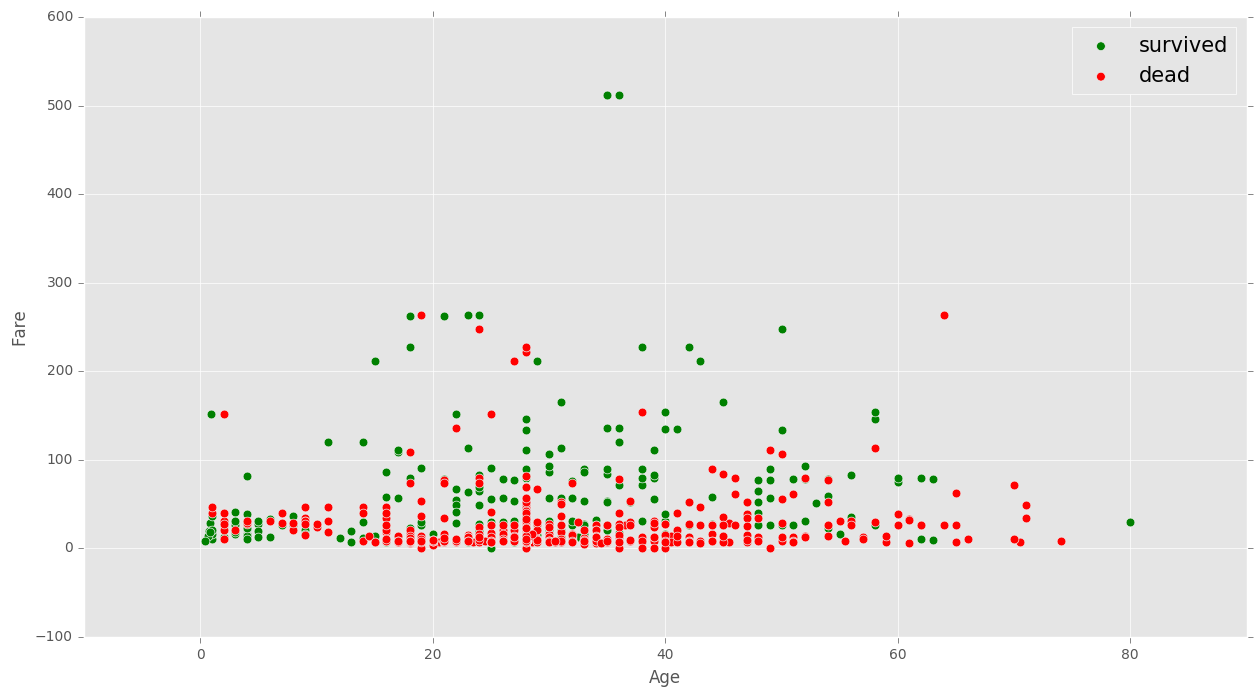

In [11]:
figure=plt.figure(figsize=(15,8))
ax=plt.subplot()
ax.scatter(data[data['Survived']==1]['Age'], data[data['Survived']==1]['Fare'], c='green', s=40)
ax.scatter(data[data['Survived']==0]['Age'], data[data['Survived']==0]['Fare'], c='red', s=40)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('survived','dead'),scatterpoints=1, loc='upper right', fontsize=15,)


### A distinct cluster of dead passanger(red one) are found on chart. Those people are adults(age between 5 and 50) of lower class(lowest ticket fares)


In [12]:
data.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,36.812130,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.765380,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.932627,0.615071,0.393075,13.675550


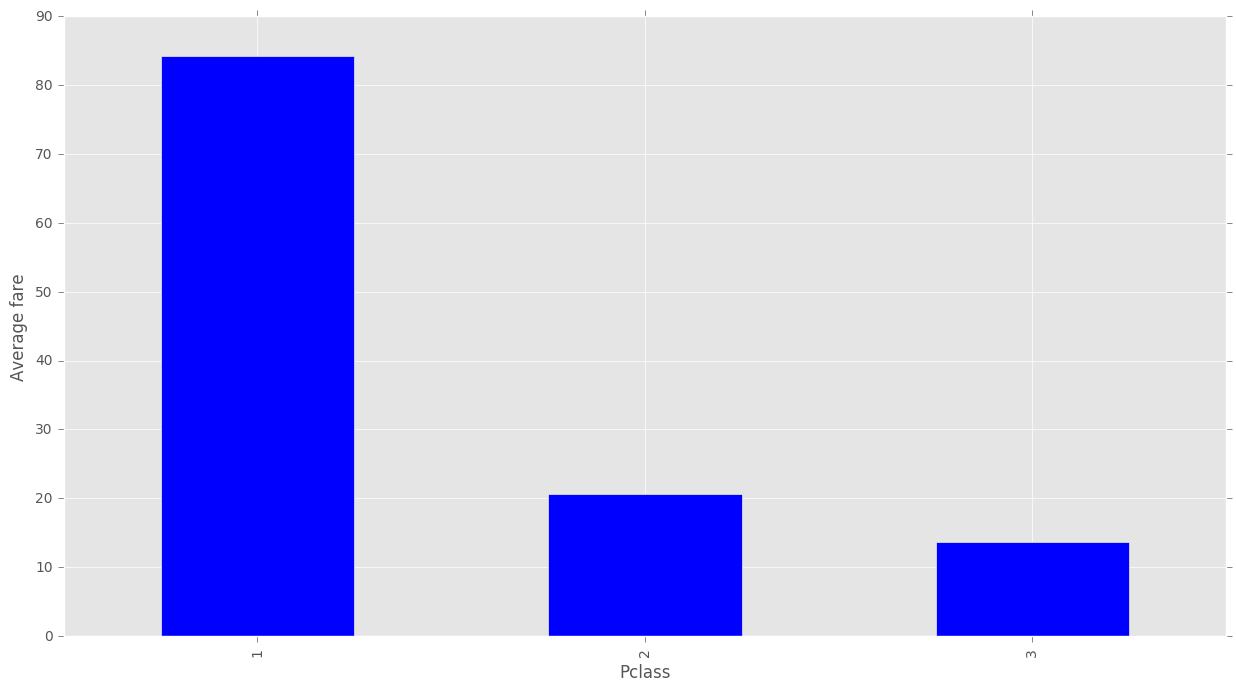

In [13]:
ax = plt.subplot()
ax.set_ylabel('Average fare')
data.groupby('Pclass').mean()['Fare'].plot(kind='bar', figsize=(15,8), ax=ax)

### let's now see how embarkation site affect the survival

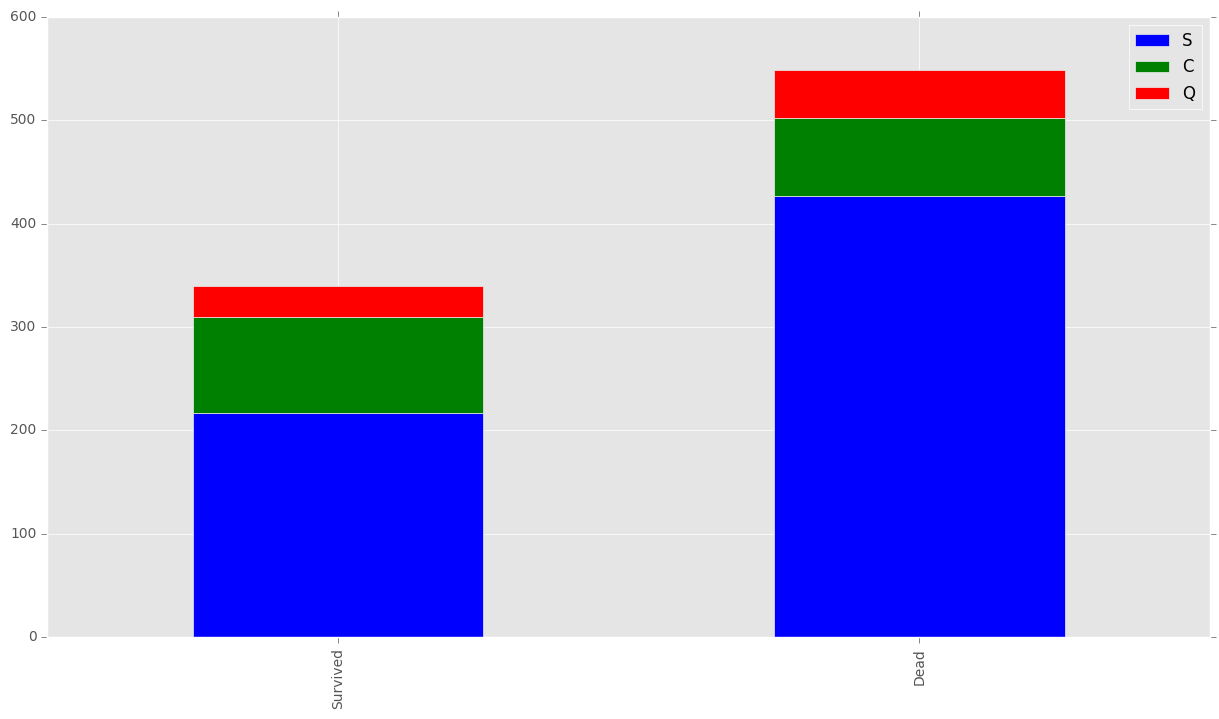

In [14]:

survived_embark = data[data['Survived']==1]['Embarked'].value_counts()
dead_embark = data[data['Survived']==0]['Embarked'].value_counts()
df = pd.DataFrame([survived_embark,dead_embark])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(15,8))

### There is no distinct correlation here...

###  2 . Feature Engineering

### In the previous part we flirted with data and spotted some interesting correlations.

### now in this part, we will focus on the ways to transform these specific features in such a way that they become easily fed to machine learning algoriths.

### we will create some other features that willl be helpful in building the model.
### We will break our code in separate functions for more clarity.

### But first, let's define a print function that asserts whether or not a feature has been processed.


In [15]:
def status(feature):
    print 'Processing' , feature ,': ok'

### Load the Data

### Combining the training and Testing set


In [16]:
def get_combined_data():
    #reading train data
    train=pd.read_csv('train.csv')
    test=pd.read_csv('test.csv')
    
    # extracting and then removing target from training set
    targets=train.Survived
    train.drop('Survived',1,inplace=True)
    
    # now merging train and test data for future engineering
    combined=train.append(test)
    combined.reset_index(inplace=True)
    combined.drop('index',inplace=True,axis=1)
    return combined    

In [17]:
combined=get_combined_data()

In [18]:
combined.shape

(1309, 11)

In [19]:
combined.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


### Extracting Passenger titles

In [20]:
def get_titles():
    global combined
    
    # we extract the title from each name
    combined['Title']=combined['Name'].map(lambda name : name.split(',')[1].split('.')[0].strip())
    
     # a map of more aggregated titles
    Title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royalty",
                        "Don":        "Royalty",
                        "Sir" :       "Royalty",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "the Countess":"Royalty",
                        "Dona":       "Royalty",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royalty"

                        }
    # We map each title
    combined['Title']=combined.Title.map(Title_Dictionary)  

In [21]:
get_titles()

In [22]:
combined.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Mrs
4,5,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,Mr


### Processing the ages

### Simply replacing the missing values with mean or median age might not be the best solution since the age may differ by group and category of Passenger

#### To understand why let's group our dataset by sex, Passenger class and Title and for each subset compute the median age

In [23]:
grouped=combined.groupby(['Sex','Pclass','Title'])

In [24]:
grouped.median()

PassengerId   Age  SibSp  Parch      Fare
Sex    Pclass Title                                             
female 1      Miss           529.5  30.0      0      0   99.9625
              Mrs            853.5  45.0      1      0   78.1125
              Officer        797.0  49.0      0      0   25.9292
              Royalty        760.0  39.0      0      0   86.5000
       2      Miss           606.5  20.0      0      0   20.2500
              Mrs            533.0  30.0      1      0   26.0000
       3      Miss           603.5  18.0      0      0    8.0500
              Mrs            668.5  31.0      1      1   15.5000
male   1      Master         803.0   6.0      1      2  134.5000
              Mr             634.0  41.5      0      0   47.1000
              Officer        678.0  52.0      0      0   37.5500
              Royalty        600.0  40.0      0      0   27.7208
       2      Master         550.0   2.0      1      1   26.0000
              Mr             723.5  30.0      0      0   13.0000
              Officer        513.0  41.5      0      0   13.0000
       3      Master         789.0   6.0      3      1   22.3583
              Mr             640.5  26.0      0      0    7.8958

### Look at the median age column and see how this value can be different based on the Sex, Pclass and Title put together.

#### For example:
    * If the passenger is female, from Pclass 1, and from royalty the median age is 39.
    * If the passenger is male, from Pclass 3, with a Mr title, the median age is 26.


### Let's create a function that fills in the missing age in combined based on these different attributes.

In [25]:
def process_age():
    
    global combined
    
    # a function that fills the missing values of the Age variable
    
    def fillAges(row):
        if row['Sex']=='female' and row['Pclass'] == 1:
            if row['Title'] == 'Miss':
                return 30
            elif row['Title'] == 'Mrs':
                return 45
            elif row['Title'] == 'Officer':
                return 49
            elif row['Title'] == 'Royalty':
                return 39

        elif row['Sex']=='female' and row['Pclass'] == 2:
            if row['Title'] == 'Miss':
                return 20
            elif row['Title'] == 'Mrs':
                return 30

        elif row['Sex']=='female' and row['Pclass'] == 3:
            if row['Title'] == 'Miss':
                return 18
            elif row['Title'] == 'Mrs':
                return 31

        elif row['Sex']=='male' and row['Pclass'] == 1:
            if row['Title'] == 'Master':
                return 6
            elif row['Title'] == 'Mr':
                return 41.5
            elif row['Title'] == 'Officer':
                return 52
            elif row['Title'] == 'Royalty':
                return 40

        elif row['Sex']=='male' and row['Pclass'] == 2:
            if row['Title'] == 'Master':
                return 2
            elif row['Title'] == 'Mr':
                return 30
            elif row['Title'] == 'Officer':
                return 41.5

        elif row['Sex']=='male' and row['Pclass'] == 3:
            if row['Title'] == 'Master':
                return 6
            elif row['Title'] == 'Mr':
                return 26
    
    combined.Age = combined.apply(lambda r : fillAges(r) if np.isnan(r['Age']) else r['Age'], axis=1)
    
    status('age')

In [26]:
process_age()

Processing age : ok


In [27]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Title          1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 102.3+ KB


### Perfect . The missing age has been replaced.

** Let's now process the names **

In [28]:
def process_names():
    
    global combined
    
    # we clean the name variable
    combined.drop('Name',axis=1, inplace=True)
    
    # encoding in dummy variable
    title_dummies=pd.get_dummies(combined['Title'],prefix='Title')
    combined=pd.concat([combined,title_dummies],axis=1)
    
    # removing title variable
    combined.drop('Title',axis=1,inplace=True)
    
    status('names')

In [29]:
process_names()

Processing names : ok


In [30]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,3,male,22,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0
1,2,1,female,38,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,0
2,3,3,female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,0
3,4,1,female,35,1,0,113803,53.1000,C123,S,0,0,0,1,0,0
4,5,3,male,35,0,0,373450,8.0500,NaN,S,0,0,1,0,0,0


### Processing Fare

In [31]:
def process_fare():
    
    global combined
    
    # replace missing fare values
    combined.Fare.fillna(combined.Fare.mean(),inplace=True)
    
    status('Fare')

In [32]:
process_fare()

Processing Fare : ok


### Processing Embarked

In [33]:
def process_embarked():
    global combined
    
    # 2 missing values in embarked column
    combined.Embarked.fillna('S',inplace=True)
    
    # encoding in dummy variables
    embarked_dummies=pd.get_dummies(combined['Embarked'],prefix='Embarked')
    combined=pd.concat([combined, embarked_dummies],axis=1)
    
    # removing embarked variable
    combined.drop('Embarked',axis=1,inplace=True)
    
    status('Embarked')

In [34]:
process_embarked()

Processing Embarked : ok


### Processing Cabin

In [35]:
def process_cabin():
    global combined
    
    # replacing missing cabin with U (for unknown)
    combined.Cabin.fillna('U',inplace=True)
    
    # mapping each cabin value with cabin letter
    combined.Cabin=combined.Cabin.map(lambda c : c[0])
    
    # encoding in dummy variable
    cabin_dummies=pd.get_dummies(combined.Cabin,prefix='Cabin')
    combined=pd.concat([combined,cabin_dummies],axis=1)
    
    # removing cabin variable
    combined.drop('Cabin',axis=1,inplace=True)
    
    status('Cabin')

In [36]:
process_cabin()

Processing Cabin : ok


In [37]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 26 columns):
PassengerId      1309 non-null int64
Pclass           1309 non-null int64
Sex              1309 non-null object
Age              1309 non-null float64
SibSp            1309 non-null int64
Parch            1309 non-null int64
Ticket           1309 non-null object
Fare             1309 non-null float64
Title_Master     1309 non-null float64
Title_Miss       1309 non-null float64
Title_Mr         1309 non-null float64
Title_Mrs        1309 non-null float64
Title_Officer    1309 non-null float64
Title_Royalty    1309 non-null float64
Embarked_C       1309 non-null float64
Embarked_Q       1309 non-null float64
Embarked_S       1309 non-null float64
Cabin_A          1309 non-null float64
Cabin_B          1309 non-null float64
Cabin_C          1309 non-null float64
Cabin_D          1309 non-null float64
Cabin_E          1309 non-null float64
Cabin_F          1309 non-null float64
Cabin_

In [38]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,1,3,male,22,1,0,A/5 21171,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,2,1,female,38,1,0,PC 17599,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,3,3,female,26,0,0,STON/O2. 3101282,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,4,1,female,35,1,0,113803,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,5,3,male,35,0,0,373450,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


### Processing Sex

In [39]:
def process_sex():
    global combined
    
    # converting string into numerical variables
    
    combined.Sex=combined.Sex.map({'male':1,'female':0})
    
    status('Sex')

In [40]:
process_sex()

Processing Sex : ok


### Processing  Pclass

In [41]:
def process_Pclass():
    global combined
    
    # encoding into 3 categories
    pclass_dummies=pd.get_dummies(combined.Pclass,prefix='Pclass')
    combined=pd.concat([combined,pclass_dummies],axis=1)
    
    # removing pclass variable
    combined.drop('Pclass',axis=1,inplace=True)
    
    status('Pclass')

In [42]:
process_Pclass()

Processing Pclass : ok


### Processing Ticket

In [43]:
def process_ticket():
    global combined
    
    # a function that extract each prefix of the ticket, return 'xxx' if no prefix means ticket is a digit
    def clean_ticket(ticket):
        ticket=ticket.replace('.','')
        ticket=ticket.replace('/','')
        ticket=ticket.split()
        ticket=map(lambda t : t.strip() , ticket)
        ticket=filter(lambda t : not t.isdigit() , ticket)
        if len(ticket)>0:
            return ticket[0]
        else:
            return 'xxx'
    
    # extracting dummy variables from ticket
    combined['Ticket']=combined.Ticket.map(clean_ticket)
    tickets_dummies=pd.get_dummies(combined.Ticket, prefix='Ticket')
    combined=pd.concat([combined,tickets_dummies],axis=1)
    
    # removing ticket variables
    combined.drop('Ticket',axis=1, inplace=True)
    
    status('Ticket')
    

In [44]:
process_ticket()

Processing Ticket : ok


In [45]:
combined.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA3,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_xxx
0,1,1,22,1,0,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,38,1,0,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,0,26,0,0,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,4,0,35,1,0,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,1,35,0,0,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [46]:
combined.shape


(1309, 64)

### Processing Family

In [47]:
def process_family():
    
    global combined
    
    # introducing new feature size of the families including passenger itself.
    combined['FamilySize']= combined['Parch'] + combined['SibSp'] + 1
    
    # introducing other feature based on family size
    combined['Singleton']=combined.FamilySize.map(lambda s : 1 if s==1 else 0)
    combined['SmallFamily']=combined.FamilySize.map(lambda s : 1 if 2<=s<=4 else 0)
    combined['LargeFamily']=combined.FamilySize.map(lambda s : 1 if s>=5 else 0)
    
    status('Family')
    
    

In [48]:
process_family()

Processing Family : ok


In [49]:
combined.shape

(1309, 68)

### We end up with total of 68 features

In [50]:
combined.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA3,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_xxx,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,1,22,1,0,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0
1,2,0,38,1,0,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0
2,3,0,26,0,0,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
3,4,0,35,1,0,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,1,0
4,5,1,35,0,0,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0


### As You can see feature range in different interval. Let's normalize all of them in unit interval

In [57]:
def scale_all_features():
    global combined
    
    features=list(combined.columns)
    features.remove('PassengerId')
    combined[features]=combined[features].apply(lambda x : x/x.max(),axis=0)
    
    print 'Feature scaled successfully'
    

In [58]:
scale_all_features()

Feature scaled successfully


In [59]:
combined.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA3,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_xxx,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,1,0.2750,0.125,0,0.014151,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.181818,0,1,0
1,2,0,0.4750,0.125,0,0.139136,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.181818,0,1,0
2,3,0,0.3250,0.000,0,0.015469,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.090909,1,0,0
3,4,0,0.4375,0.125,0,0.103644,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.181818,0,1,0
4,5,1,0.4375,0.000,0,0.015713,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.090909,1,0,0


### Modeling